In [1]:
import pandas as pd
df = pd.read_csv("data.csv")

In [2]:
# on voit bien pour cette variable que c'est pas toutes les valeurs qui contiennent des donnees 
df.describe()

,id,tax
count,1000.000000,654.0
mean,500.500000,20.0
std,288.819436,0.0
min,1.000000,20.0
25%,250.750000,20.0
50%,500.500000,20.0
75%,750.250000,20.0
max,1000.000000,20.0


In [3]:
# on voit pour cette variable la totalité des donnees
df["price_paid"].describe()

count      1000
unique      528
top       $3.73
freq          8
Name: price_paid, dtype: object

In [4]:
# pour voir la moyenne des prix payés
df.price_paid = df.price_paid.apply(lambda x: x.replace("$", "")) # pour retirer les $ dans la colonne price_paid
df.price_paid = df.price_paid.astype(float) # pour convertir le type de la variable price_paid en float

In [5]:
df["price_paid"].mean()

6.4619299999999935

In [6]:
# pour afficher la somme
df["price_paid"].sum()

6461.93

In [7]:
# pour afficher le prix minimal qui a été payé
df["price_paid"].min()

3.0

In [8]:
# pour afficher le prix maximal qui a été payé
df["price_paid"].max()

10.0

In [9]:
# pour afficer les valeurs unique dans une colonne
df["country"].unique()

array(['Canada', 'United States', 'Morocco', 'France', nan], dtype=object)

In [10]:
df["price_paid"].unique()

array([ 5.36,  8.32,  3.73,  3.7 ,  9.24,  5.82,  6.29,  3.01,  9.05,
        5.71,  3.15,  5.3 ,  5.97,  4.53,  4.1 ,  6.44,  3.16,  4.9 ,
        5.55,  4.86,  6.72,  9.79,  8.23,  9.9 ,  5.88,  3.06,  9.52,
        6.76,  7.81,  6.02,  5.  ,  5.34,  4.67,  6.22,  3.37,  9.5 ,
        4.54,  4.04,  3.45,  4.96,  5.29,  8.11,  7.8 ,  4.21,  9.81,
        9.7 ,  9.71,  3.88,  3.4 ,  9.23,  6.57,  9.99,  6.94,  4.26,
        9.13,  6.66,  9.35,  3.04,  6.17,  7.68,  4.23,  4.69,  7.56,
        5.92,  4.65,  6.79,  8.71,  8.96,  4.39,  7.54,  5.83,  6.39,
        9.6 ,  9.68,  9.86,  5.53,  3.51,  8.43,  6.89,  6.68,  4.66,
        4.95,  6.77,  7.48,  7.23,  8.12,  5.8 ,  6.06,  4.71,  7.78,
        9.67,  9.93,  4.56,  4.42,  4.12,  4.32,  8.83,  3.18,  8.86,
        7.2 ,  3.72,  7.67,  8.68,  9.58,  7.91,  7.65,  8.77,  7.17,
        9.47,  8.97,  6.07,  9.89,  8.85,  9.37,  7.03,  5.9 ,  4.  ,
        6.88,  8.75,  3.03,  6.64,  8.65,  5.98,  8.69,  4.46,  4.24,
        8.79,  4.82,

In [11]:
# une autre methode d'affichage des valeurs
df["country"].value_counts()
# on voit ici qu'on a plus de clients en France

France           408
United States    333
Canada           161
Morocco           54
Name: country, dtype: int64

In [12]:
# pour voir combien dez clients qu'on en fonction du sexe
df["gender"].value_counts()
# on voit ici qu'on a plus de clients femme

Female    493
Male      438
Name: gender, dtype: int64

In [13]:
# en terme de pourcentage
df["gender"].value_counts(normalize = True)

Female    0.529538
Male      0.470462
Name: gender, dtype: float64

In [14]:
# la methode groupby
df.groupby("country").mean()
# on voit bien le pays ou l'on le prix moyen le plus c'est le Maroc et le moins c'est le Canada

,id,price_paid,tax
country,,,
Canada,437.049689,6.319565,20.0
France,525.588235,6.420613,20.0
Morocco,492.425926,6.721667,20.0
United States,504.954955,6.557568,20.0


In [15]:
# on voit bien que les femmes ont payées le plus
df.groupby("gender")["price_paid"].sum()

gender
Female    3165.26
Male      2833.61
Name: price_paid, dtype: float64

In [16]:
df.groupby(["gender","country"]).mean()

id  price_paid   tax
gender country                                    
Female Canada         461.472973    6.419324  20.0
       France         512.648241    6.350352  20.0
       Morocco        479.925926    7.024815  20.0
       United States  487.282353    6.437118  20.0
Male   Canada         406.000000    6.117467  20.0
       France         534.928177    6.498950  20.0
       Morocco        483.652174    6.146957  20.0
       United States  525.284722    6.672500  20.0

<AxesSubplot:xlabel='date'>

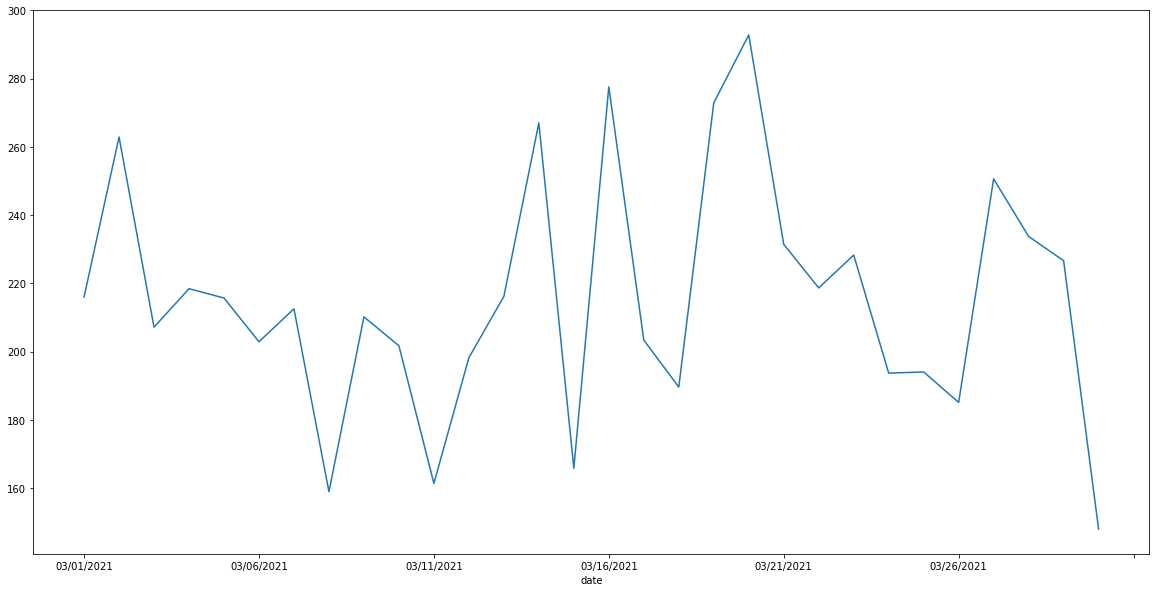

In [19]:
df.groupby("date")["price_paid"].sum().plot(figsize=[20,10])

<AxesSubplot:ylabel='price_paid'>

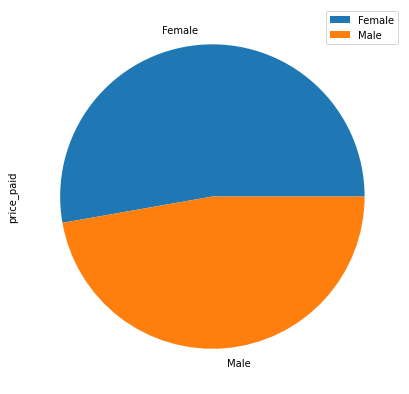

In [24]:
# D'autres graphiques
# faire un figsize pour faire grossir le graphique
# ici les femmes on plus payées que les hommes
df.groupby("gender")["price_paid"].sum().plot.pie(legend=True, figsize=(7,7))

<AxesSubplot:xlabel='country'>

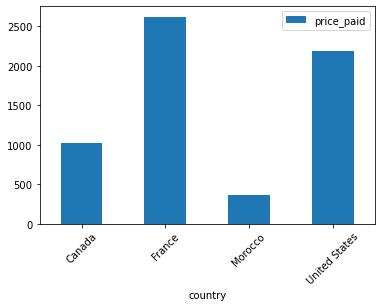

In [26]:
# on voit bien que la france est le pays le plus important en terme de chiffre d'affaire et le maroc le moins important
df.groupby("country")["price_paid"].sum().plot.bar(rot=45, legend=True)